In [43]:
from src.datamodules.mtsd_datamodule import MtsdDataModule
import hydra
from src.utils.visualize import show_image

In [30]:
with hydra.initialize(config_path="conf"):
    cfg = hydra.compose(config_name="config.yaml")
    data = MtsdDataModule(cfg=cfg)

In [31]:
data.setup()

Train len: 1936
Val len: 269


In [32]:
train = data.train_dataloader()

In [48]:
myImg = None
myTarget = None
for imgs, targets in train:
    for img, target in zip(imgs,targets):
        if len(target['labels']) > 1:
            myImg = img
            myTarget = target
            break
    if myImg is not None:
        break

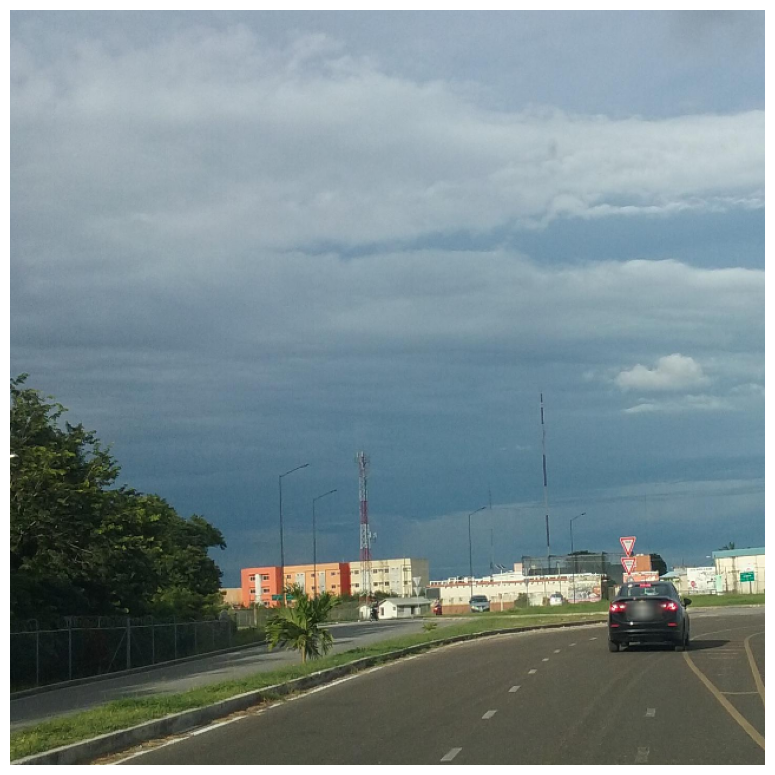

In [50]:
show_image(myImg.permute(1,2,0))

In [51]:
myImg.shape

torch.Size([3, 640, 640])

In [53]:
myTarget

{'boxes': tensor([[517.6231, 463.8240, 530.1838, 480.0385],
         [516.7857, 446.1789, 530.7421, 463.8240]]),
 'labels': tensor([1, 1]),
 'area': tensor([203.6643, 246.2619])}

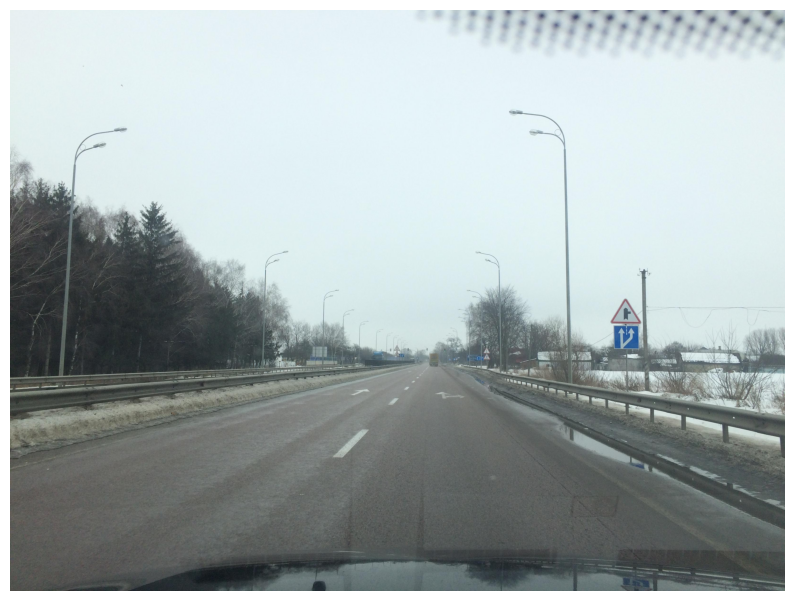

In [56]:
val = data.val_dataloader()
imgs, targets = next(iter(val))
show_image(imgs[0].permute((1,2,0)))

In [57]:
targets[0]

{'boxes': tensor([[1875.8438, 1466.6484, 1886.2031, 1478.6016]]),
 'labels': tensor([1]),
 'area': tensor([123.8269])}

In [69]:
from src.utils.load_files import load_image, load_annotation

In [767]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
def get_transform(train, width=1000, height=1000):
    """
    Transformation
    """

    if train:
        if width > 1000:
            width = 1000
        if height > 1000:
            height = 1000

        return A.Compose(
            [
                A.RandomBrightnessContrast(p=0.5),
                A.Rotate(limit=(-20,20), p=0.5),
                A.RandomCrop(width=width, height=height, p=1.0),
                A.GaussianBlur(blur_limit=(3, 5), sigma_limit=(0.1, 0.2), p=0.5),
                ToTensorV2(p=1.0),
            ],
            bbox_params={
                "format": "pascal_voc",
                "label_fields": ["labels"],
                "min_area": 100,
            },
        )
    else:
        if width >= 2024 or height >= 2024:
            if width >= height:
                if width > 4000:
                    height = height * 4000 // width
                    width = 4000
                else:
                    height = height * 2024 // width
                    width = 2024
            else:
                if height > 4000:
                    width = width * 4000 // height
                    height = 4000
                else:
                    width = width * 2040 // height
                    height = 2040

        return A.Compose(
            [
                A.Resize(width=width, height=height, p=1.0),
                ToTensorV2(p=1.0),
            ],
            bbox_params={"format": "pascal_voc", "label_fields": ["labels"]},
        )


In [293]:
id = "-1ZXiNNunp0TA-puToNbeQ"
img = load_image(id, dataset_name="MTSD")
anno = load_annotation(id, "MTSD")

In [531]:
target = {}

boxes = []
labels = []

for obj in anno["objects"]:
    label = obj["label"]
    box = obj["bbox"]
    if label != 'other-sign':
        labels.append(label)
        boxes.append([box["xmin"], box["ymin"], box["xmax"], box["ymax"]])

target = {
    "boxes": boxes,
    "labels": labels,
}
target

{'boxes': [[276.25, 987.7587890625, 534.21875, 1210.5615234375],
  [2825.46875, 988.9013671875, 3019.453125, 1177.4267578125]],
 'labels': ['regulatory--yield--g1', 'regulatory--stop--g1']}

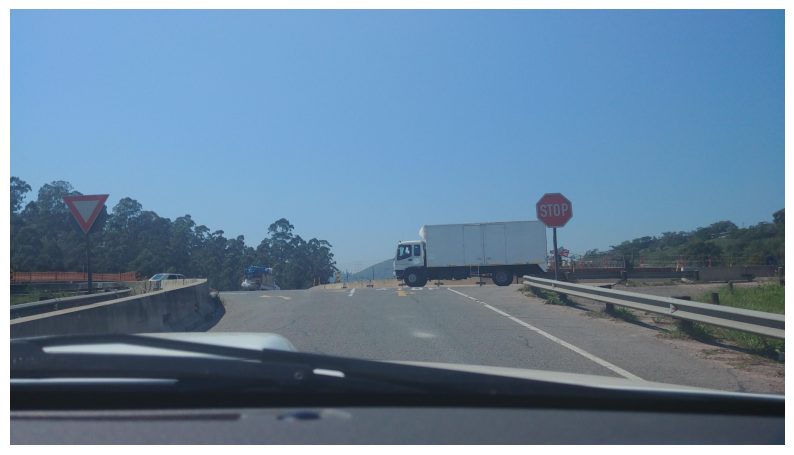

In [522]:
show_image(img)

{'boxes': [[258.4375, 104.23828125, 281.640625, 124.5703125]], 'labels': ['warning--junction-with-a-side-road-perpendicular-right--g1']}


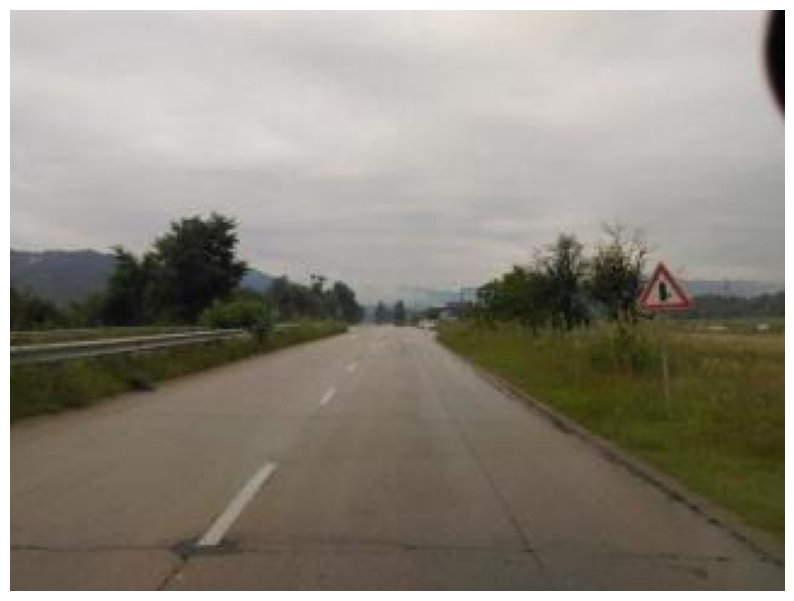

In [591]:
id2 = '1Bjp_0HQAFULWiMKBozaWA'
img2 = load_image(id2, dataset_name="MTSD")
anno2 = load_annotation(id2, "MTSD")

target2 = {}

boxes2 = []
labels2 = []

for obj in anno2["objects"]:
    label = obj["label"]
    box = obj["bbox"]
    if label != 'other-sign':
        labels2.append(label)
        boxes2.append([box["xmin"], box["ymin"], box["xmax"], box["ymax"]])

target2 = {
    "boxes": boxes2,
    "labels": labels2,
}
print(target2)
show_image(img2)

{'boxes': [[2010.9375, 1103.73046875, 2035.3125, 1126.93359375], [2011.875, 1060.48828125, 2028.75, 1077.36328125], [1920.9375, 1100.56640625, 1940.625, 1119.55078125], [2836.875, 1033.59375, 2865.0, 1057.32421875], [2091.5625, 1027.79296875, 2113.125, 1050.46875], [2266.875, 1057.32421875, 2291.25, 1081.58203125]], 'labels': ['warning--roadworks--g3', 'regulatory--pedestrians-only--g1', 'warning--other-danger--g1', 'information--pedestrians-crossing--g1', 'information--pedestrians-crossing--g1', 'information--pedestrians-crossing--g1']}


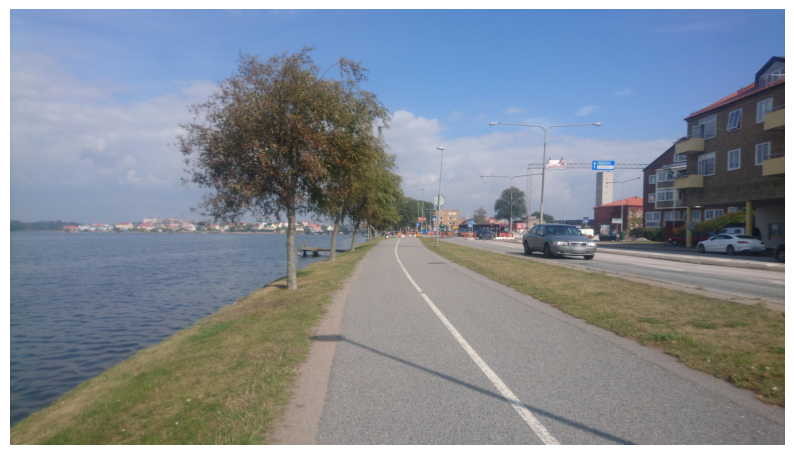

In [594]:
id3 = '_JJT0_vzPb4ooDz2GWUVrA'
img3 = load_image(id3, dataset_name="MTSD")
anno3 = load_annotation(id3, "MTSD")

target3 = {}

boxes3 = []
labels3 = []

for obj in anno3["objects"]:
    label = obj["label"]
    box = obj["bbox"]
    if label != 'other-sign':
        labels3.append(label)
        boxes3.append([box["xmin"], box["ymin"], box["xmax"], box["ymax"]])

target3 = {
    "boxes": boxes3,
    "labels": labels3,
}
print(target3)
show_image(img3)

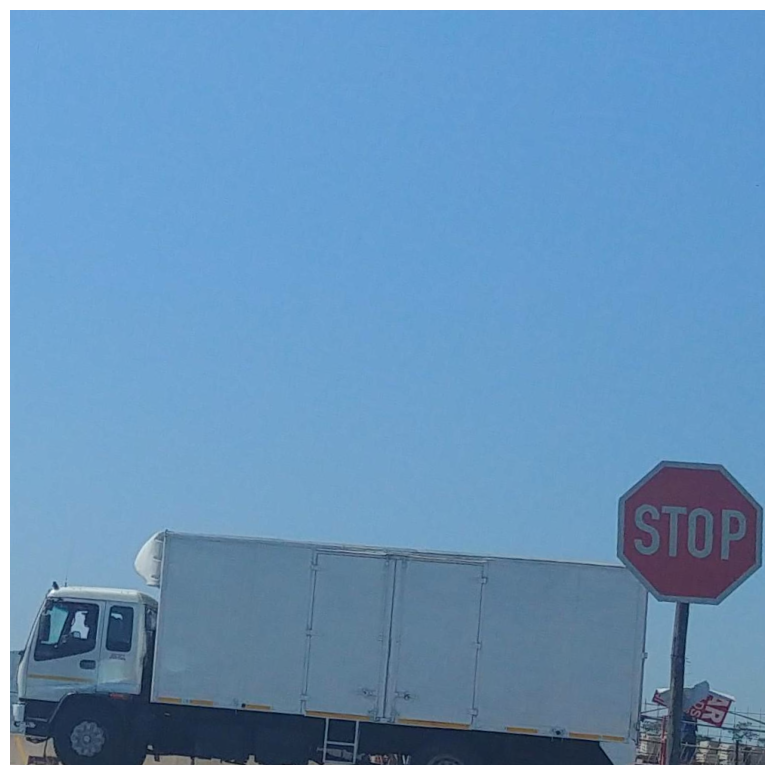

(torch.Size([3, 1000, 1000]), ['regulatory--stop--g1'])

In [750]:
transformed = get_transform(True, width=anno['width'], height=anno['height'])(image=img, bboxes=target["boxes"], labels=target["labels"])
show_image(transformed['image'].permute((1,2,0)))
transformed['image'].shape, transformed['labels']

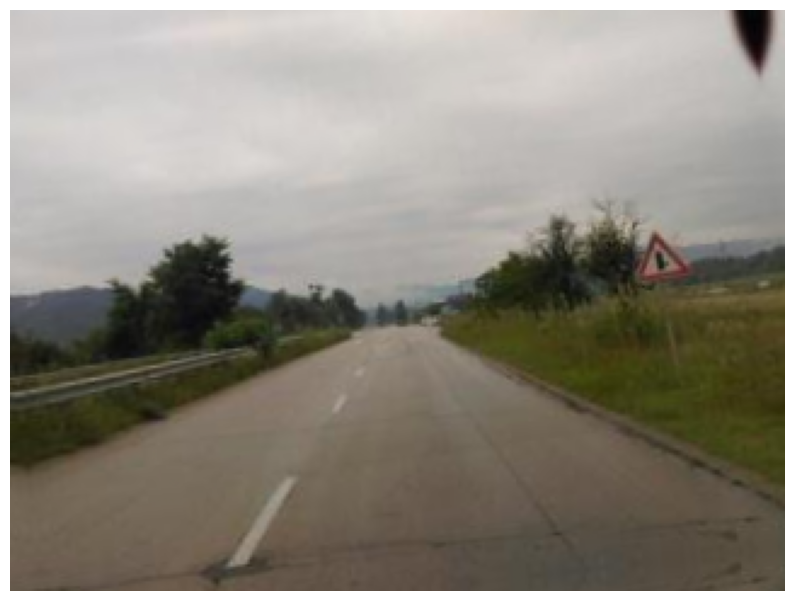

(torch.Size([3, 240, 320]),
 ['warning--junction-with-a-side-road-perpendicular-right--g1'])

In [754]:
transformed2 = get_transform(True, width=anno2['width'], height=anno2['height'])(image=img2, bboxes=target2["boxes"], labels=target2["labels"])
show_image(transformed2['image'].permute((1,2,0)))
transformed2['image'].shape, transformed2['labels']

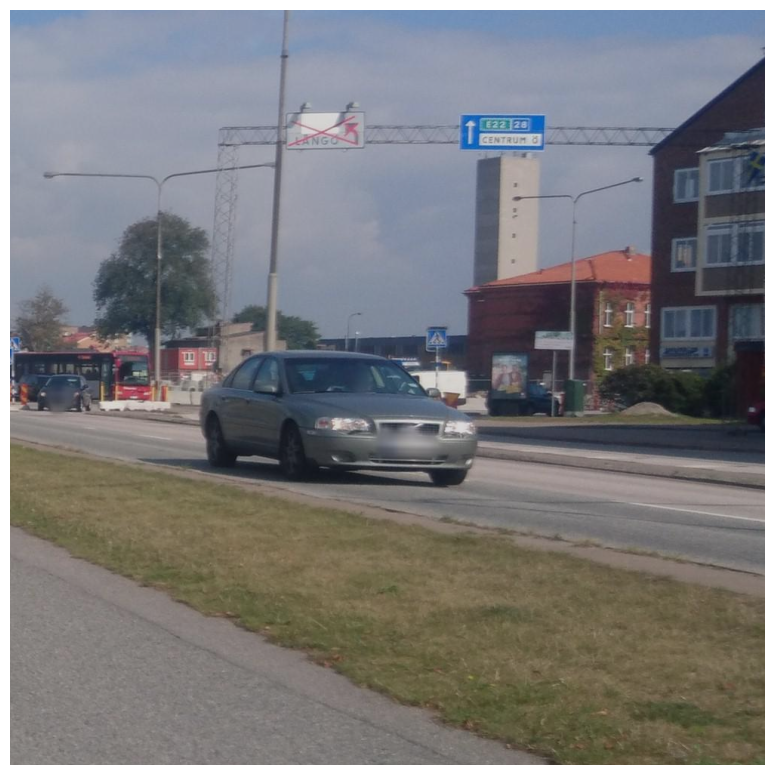

(torch.Size([3, 1000, 1000]),
 ['information--pedestrians-crossing--g1',
  'information--pedestrians-crossing--g1'])

In [766]:
transformed3 = get_transform(True, width=anno3['width'], height=anno3['height'])(image=img3, bboxes=target3["boxes"], labels=target3["labels"])
show_image(transformed3['image'].permute((1,2,0)))
transformed3['image'].shape, transformed3['labels']